In [16]:
import numpy as np
import pandas as pd
from copy import copy
from sklearn.linear_model import LogisticRegression
from numpy import log, dot, e
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import joblib

In [17]:
pip install idx2numpy


Note: you may need to restart the kernel to use updated packages.


In [18]:
#Importing LogRegression.py class
from LogRegression import LogRegression

In [19]:
df = pd.read_csv("diabetes2.csv")
df 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
#Checking the target values distribution
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
#Analyzing the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
#Checking if there is any null value present in any feature and target
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
#Checking if there is any nan value present in any feature and target
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
#Analyzing description and distribution in each feature
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
#Function to give n-folds data
def split_n_folds(df,n):
  splitDataframe=[]
  split = int(np.ceil(df.shape[0]/n))
  for x in np.arange(0,df.shape[0],split):
    a=x+split
    splitDataframe.append(df[x:a])
  return splitDataframe

In [26]:
#Calling split_n_folds function to get the 5 folds of data
data_list = split_n_folds(df,5)
data_list

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 149            2       90             70             17        0  27.3   
 150            1      136             74             50      204  37.4   
 151            4      114             65              0        0  21.9   
 152            9      156             86             28      155  34.3   
 153            1      153             82             42      485  40.6   
 
      DiabetesPedigreeFunction  Age  Outcome  
 0                       0.627   50        1  
 1  

In [12]:
#List to store accuracy foldwise for training and validation set
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0

#Loop to implement functions of LogRegression class on each 5-folds
for x in range(len(data_list)):

  #Making object of LogRegression class
  reg = LogRegression()

  #Making copy of data 
  data = copy(data_list)

  #Splitting the data in training and validation set. These sets would be different for every fold
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #Fitting the model using fit function on training data
  accuracy_training,accuracy_validation,loss_training,loss_validation,iterations = reg.fit(train_X,train_y,test_X,test_y)

  #Saving the model foldwise
  name = "Logmodel"+str(i)+".sav"
  filename = name
  joblib.dump(reg,filename)

  #Calculating predicted values for both training and validation set
  trainy_predicted = reg.predict(train_X)
  testy_predicted = reg.predict(test_X)

  #Calculating accuracy for both training and validation set
  Train_accuracy = reg.accuracy(train_y,trainy_predicted)
  Test_accuracy = reg.accuracy(test_y,testy_predicted)

  #Appending the accuracy foldwise
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)
  i = i+1

 #Printing the accuracy foldwise from the list 
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Train accuracy	[0.5602605863192183, 0.5537459283387622, 0.6351791530944625, 0.5472312703583062, 0.547077922077922]	
	Test accuracy	[0.5909090909090909, 0.5194805194805194, 0.6558441558441559, 0.5194805194805194, 0.6052631578947368]


Using the saved models to do the computations

In [27]:
#List to store accuracy foldwise for training and validation set
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0

#Loop to implement functions of LogRegression class on each 5-folds
for x in range(len(data_list)):

  #Making copy of data 
  data = copy(data_list)

  #Splitting the data in training and validation set. These sets would be different for every fold
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #Using saved the model foldwise
  name = "Logmodel"+str(i)+".sav"
  filename = name
  stored_model = joblib.load(filename)

  #Calculating predicted values for both training and validation set
  trainy_predicted = stored_model.predict(train_X)
  testy_predicted = stored_model.predict(test_X)

  #Calculating accuracy for both training and validation set
  Train_accuracy = stored_model.accuracy(train_y,trainy_predicted)
  Test_accuracy = stored_model.accuracy(test_y,testy_predicted)

  #Appending the accuracy foldwise
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)
  i = i+1

 #Printing the accuracy foldwise from the list 
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Train accuracy	[0.5602605863192183, 0.5537459283387622, 0.6351791530944625, 0.5472312703583062, 0.547077922077922]	
	Test accuracy	[0.5909090909090909, 0.5194805194805194, 0.6558441558441559, 0.5194805194805194, 0.6052631578947368]


In [28]:
#Calculating  mean of training  accuracy values
training_mean = sum(n_fold_train_accuracy)/len(n_fold_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(n_fold_test_accuracy)/len(n_fold_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.5686989720377342 validation mean 0.5781954887218045


In [18]:
#Function to do plotting
def plot_func(x,y_training,y_testing,plot_name,color_value_training,color_value_testing):
  plt.figure(figsize=(15,10))
  plt.plot(x,y_training,color= color_value_training,label='Training Set')
  plt.plot(x,y_testing,color=color_value_testing,label='Validation Set')
  plt.xlabel('Iterations')
  plt.ylabel(plot_name)
  plt.legend()
  plt.show()

FOLD 1


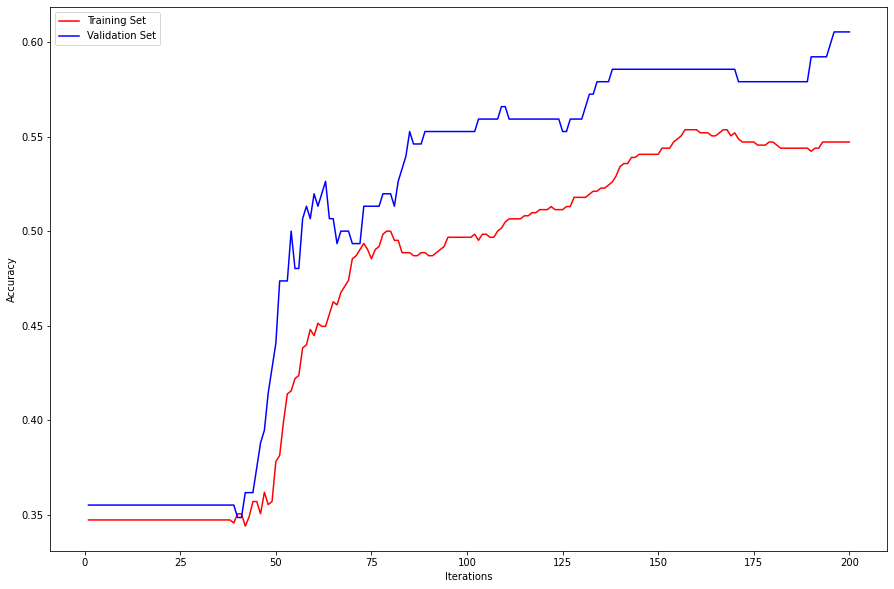

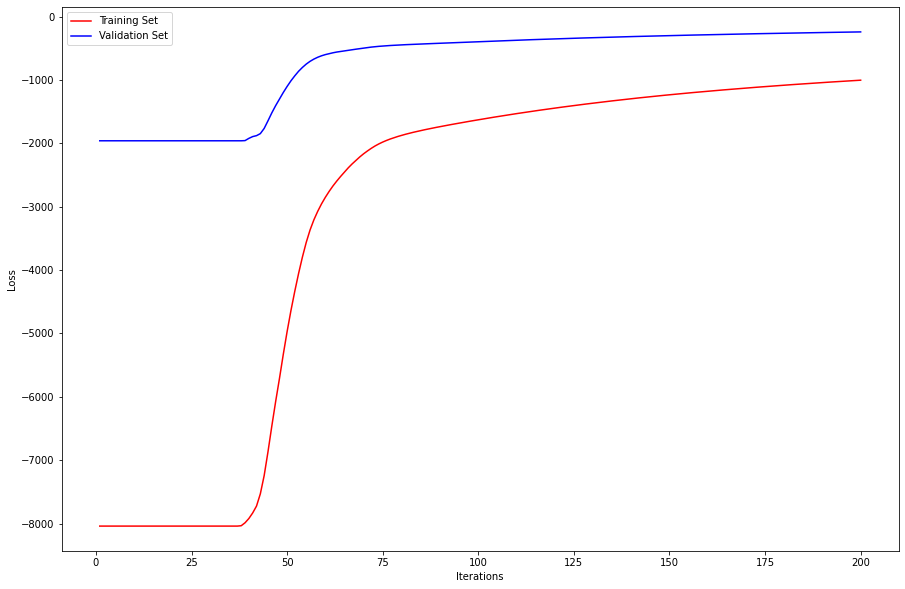

FOLD 2


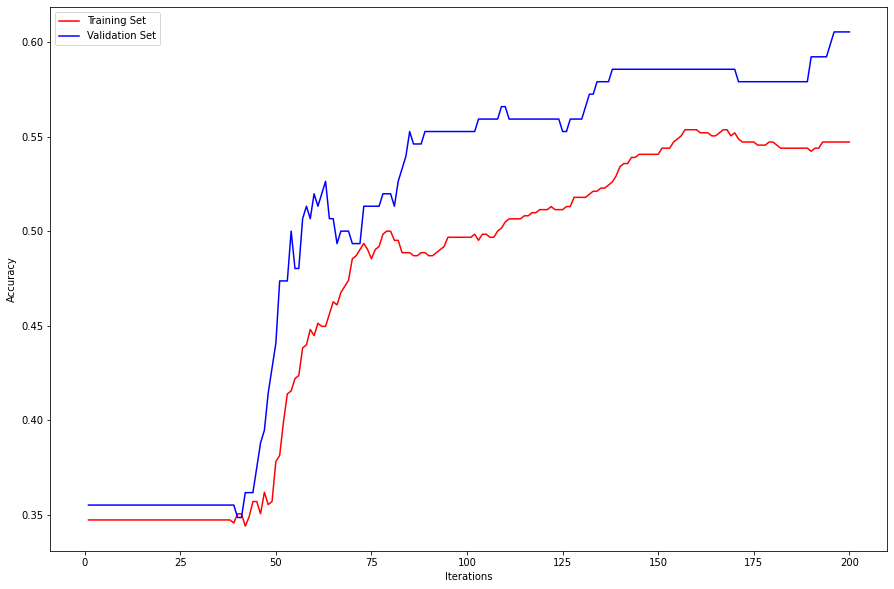

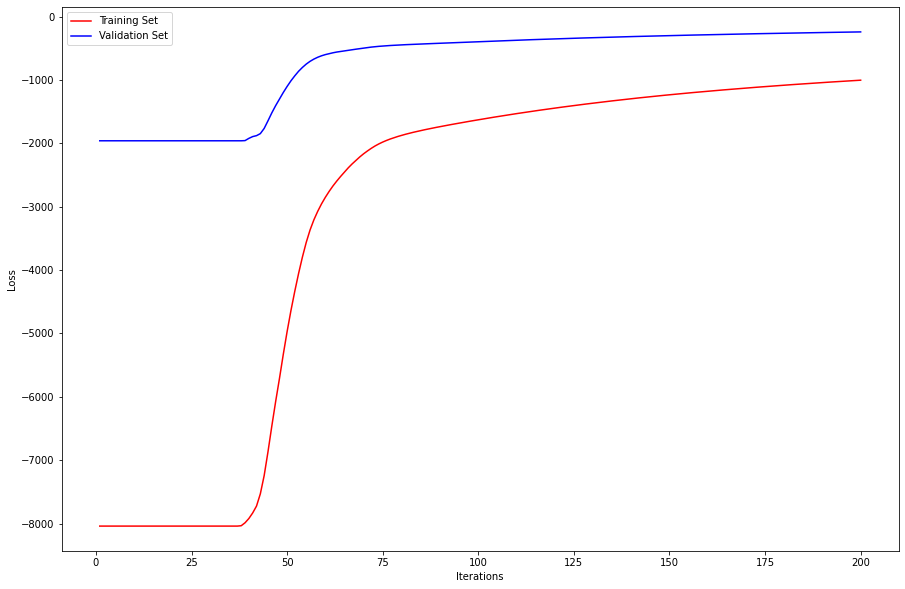

FOLD 3


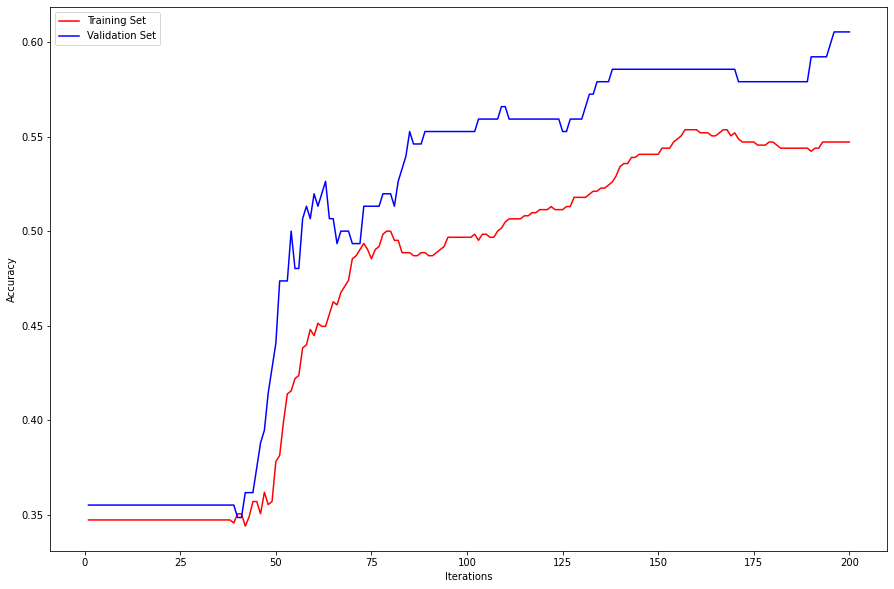

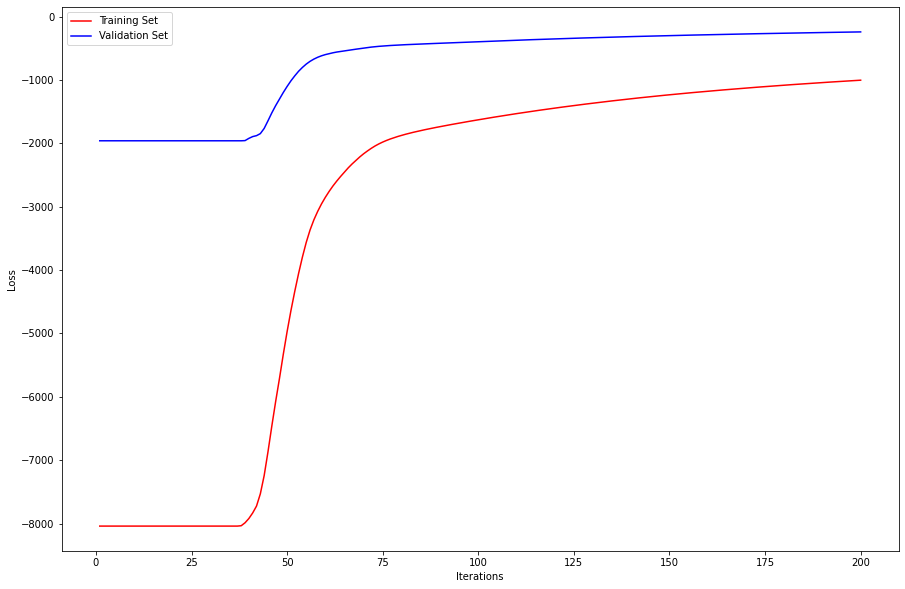

FOLD 4


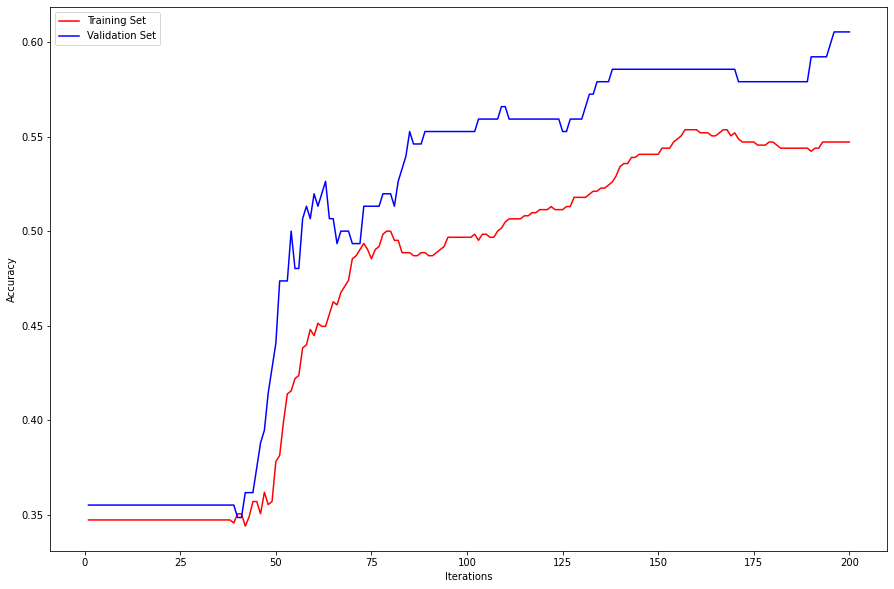

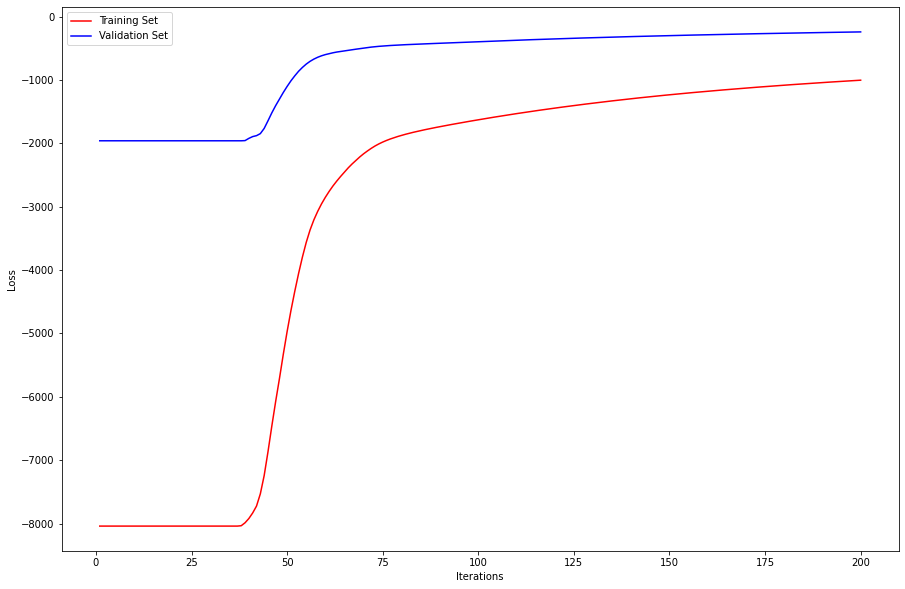

FOLD 5


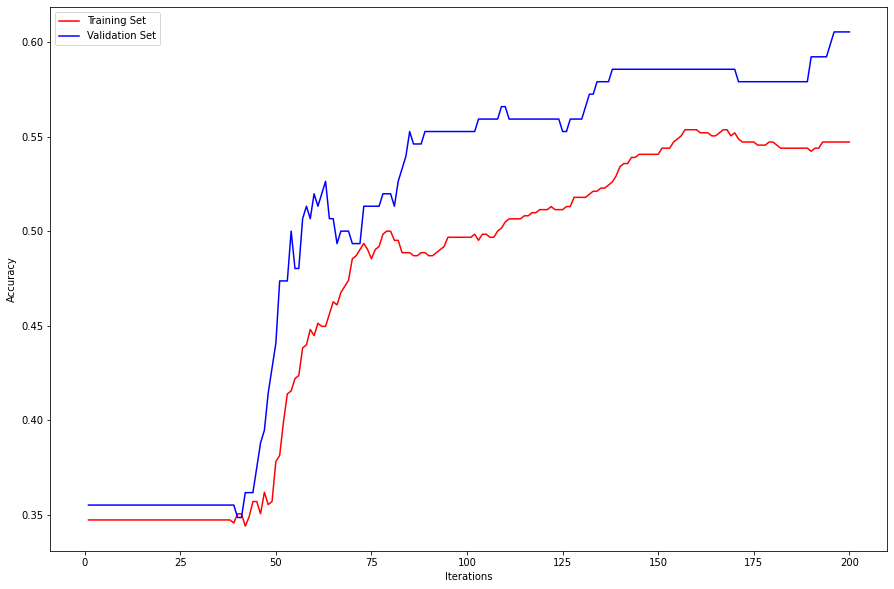

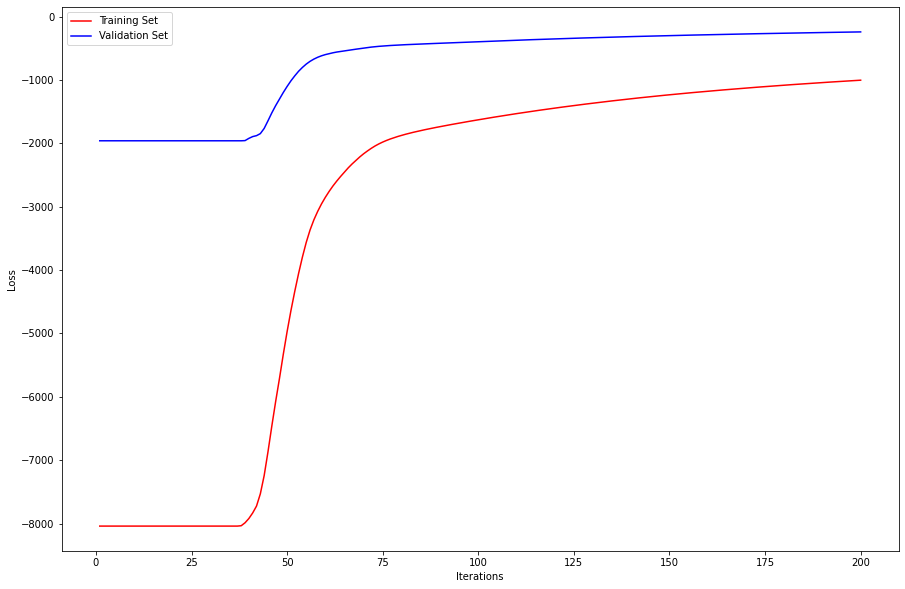

In [16]:
#For loop to get the plots on loss vs iteration and accuracy vs iteration for each fold . 
for x in range(len(data_list)):
  data = copy(data_list)
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']
  print("FOLD",x+1)
  plot_func(iterations,accuracy_training,accuracy_validation,'Accuracy','red','blue')
  plot_func(iterations,loss_training,loss_validation,'Loss','red','blue')
  
  

L2 Regularization

In [ ]:
GridSearch on the behalf of cost function loss

In [13]:
#List which will store the beta values 
beta_dict = {}

#For loop to perform grid search to get the optimal value of constant lambda(Beta in the code)
for beta in np.arange(0.001,0.01,0.001):

  #List to store cost of five fold for the given beta value
  five_fold_cost =[]
  for x in range(len(data_list)):

    #Object is created with beta value passed as an argument to activate the regularization in LogRegression class
    reg = LogRegression(beta)

    #Copy of data is made
    data = copy(data_list)

    #Data is splitted in training and validation set foldwise
    test = data.pop(x)
    train = pd.concat(data)
    train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
    train_y= train['Outcome']
    test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
    test_y= test['Outcome']

    #Model is fitted on training data
    reg.fit(train_X,train_y,test_X,test_y)

    #Cost function is called which will give loss on test data
    test_cost = reg.cost_function(test_X,test_y)

    #Appending five fold cost value
    five_fold_cost.append(test_cost)
  
  #Taking mean of the cost value
  mean_loss = sum(five_fold_cost)/len(five_fold_cost)

  #storing the mean of each fold cost value in beta list
  beta_dict[beta]=mean_loss

  #Printing beta value and their corresponding loss
  print("Beta",beta,"Loss Value",beta_dict[beta],sep='\t')
  
print('Grid Search on Beta values')



Beta	0.001	Loss Value	-362.8546333118403
Beta	0.002	Loss Value	-466.08277977706837
Beta	0.003	Loss Value	-321.46195364357106
Beta	0.004	Loss Value	-423.38150330964
Beta	0.005	Loss Value	-418.455766354297
Beta	0.006	Loss Value	-326.480782424211
Beta	0.007	Loss Value	-327.86649365861786
Beta	0.008	Loss Value	-564.6115533686244
Beta	0.009000000000000001	Loss Value	-387.542811600011
Grid Search on Beta values


Optimal value is 0.003 with loss -321.46195364357106

In [15]:
#Using optimal value of lambda(beta in code) model is fitted and accuracy is being calculated

#List to store the accuracy for train and validation data foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0
#Loop to implement functions of LogRegression class on each 5-folds
for x in range(len(data_list)):

  #Object is made with beta value as the argument . So, regularization is being followed in LogRegression class
  reg = LogRegression(0.003)

  #copy of data is being made
  data = copy(data_list)

  #data splitted into training and validation foldwise. In every iteration folds will be different
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #model is fitted on training data
  accuracy_training,accuracy_validation,loss_training,loss_validation,iterations = reg.fit(train_X,train_y,test_X,test_y)


  #Saving the model foldwise
  name = "Regularizedmodel"+str(i)+".sav"
  filename = name
  joblib.dump(reg,filename)

  #Predicted value is being calculated on training and test data
  trainy_predicted = reg.predict(train_X)
  testy_predicted = reg.predict(test_X)

  #Accuracy is computed
  Train_accuracy = reg.accuracy(train_y,trainy_predicted)
  Test_accuracy = reg.accuracy(test_y,testy_predicted)

  #Lists stores the accuracy foldwise
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  i = i+1

#Prints the accuracy foldwise for training and validation data  
print('Train accuracy',n_fold_train_accuracy,'\n','Validation accuracy',n_fold_test_accuracy,sep='\t')

Train accuracy	[0.5602605863192183, 0.5260586319218241, 0.5586319218241043, 0.5977198697068404, 0.5357142857142857]	
	Validation accuracy	[0.6038961038961039, 0.538961038961039, 0.5194805194805194, 0.5844155844155844, 0.5460526315789473]


Using saved models to do the above computations using regularization

In [29]:
#Using optimal value of lambda(beta in code) model is fitted and accuracy is being calculated

#List to store the accuracy for train and validation data foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0
#Loop to implement functions of LogRegression class on each 5-folds
for x in range(len(data_list)):

  #copy of data is being made
  data = copy(data_list)

  #data splitted into training and validation foldwise. In every iteration folds will be different
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  
  #Using saved the model foldwise
  name = "Regularizedmodel"+str(i)+".sav"
  filename = name
  stored_model = joblib.load(filename)

  #Predicted value is being calculated on training and test data
  trainy_predicted = stored_model.predict(train_X)
  testy_predicted = stored_model.predict(test_X)

  #Accuracy is computed
  Train_accuracy = stored_model.accuracy(train_y,trainy_predicted)
  Test_accuracy = stored_model.accuracy(test_y,testy_predicted)

  #Lists stores the accuracy foldwise
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  i = i+1

#Prints the accuracy foldwise for training and validation data  
print('Train accuracy',n_fold_train_accuracy,'\n','Validation accuracy',n_fold_test_accuracy,sep='\t')

Train accuracy	[0.5602605863192183, 0.5260586319218241, 0.5586319218241043, 0.5977198697068404, 0.5357142857142857]	
	Validation accuracy	[0.6038961038961039, 0.538961038961039, 0.5194805194805194, 0.5844155844155844, 0.5460526315789473]


In [30]:
#Calculating  mean of training  accuracy values
training_mean = sum(n_fold_train_accuracy)/len(n_fold_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(n_fold_test_accuracy)/len(n_fold_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.5556770590972546 validation mean 0.5585611756664388


FOLD 1


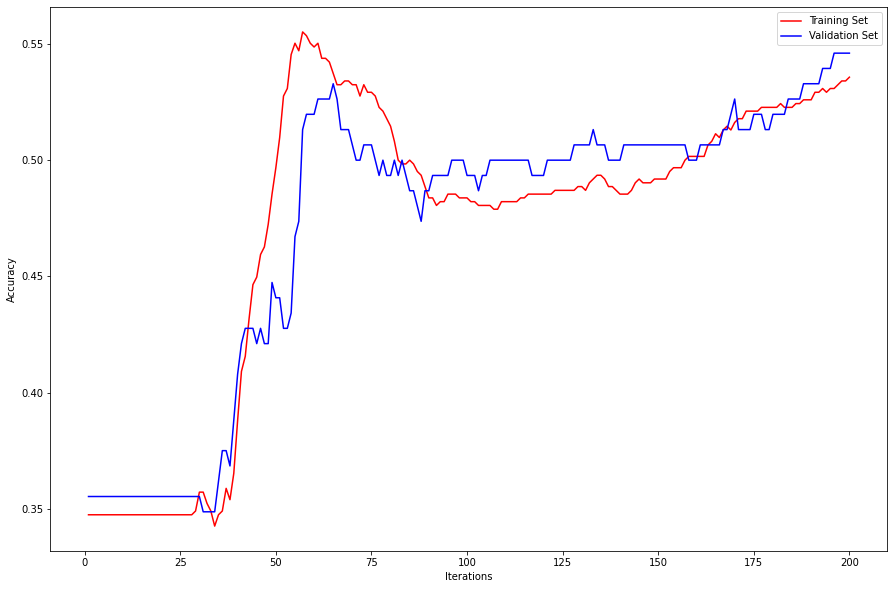

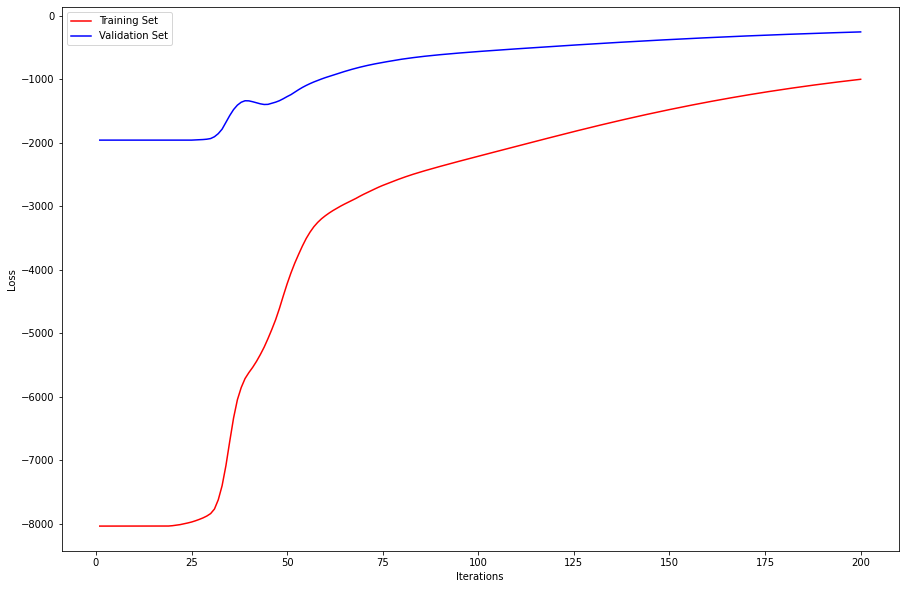

FOLD 2


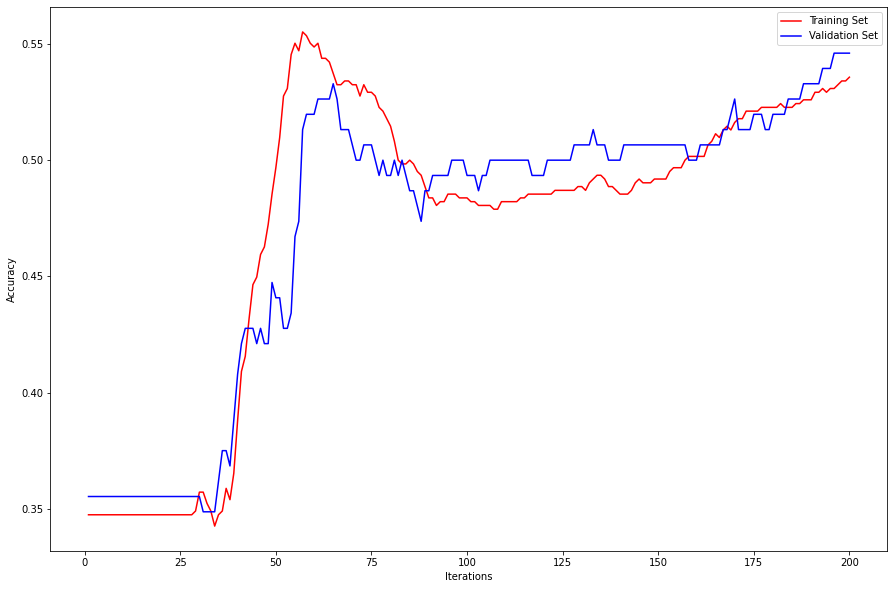

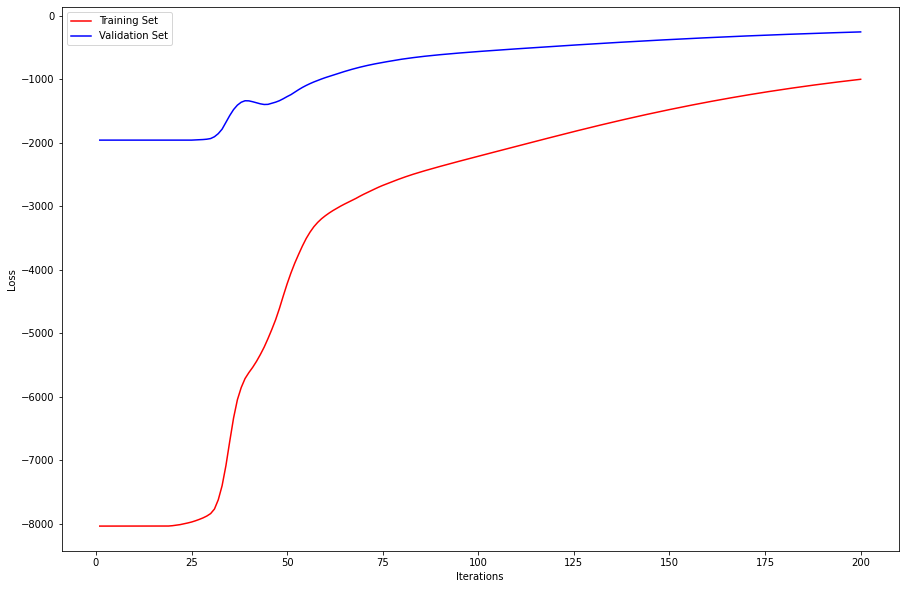

FOLD 3


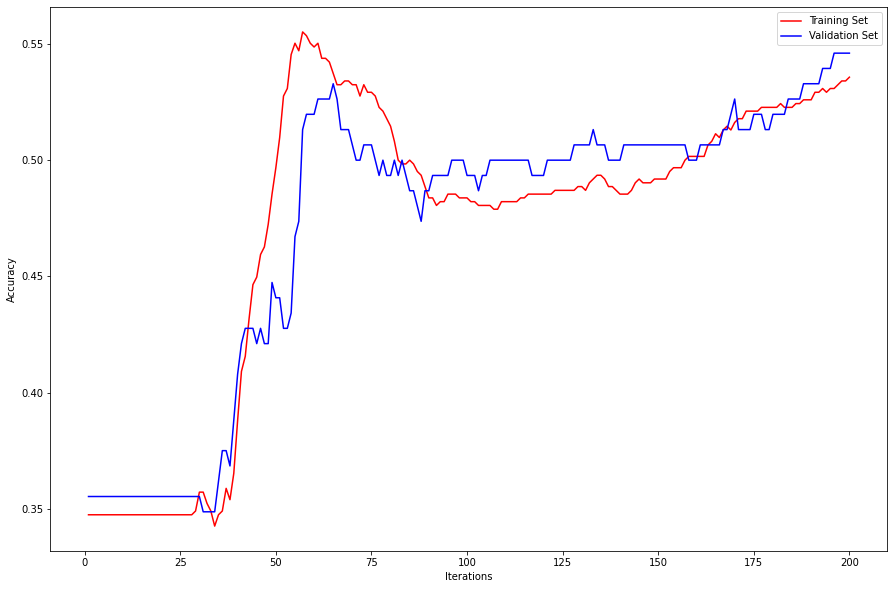

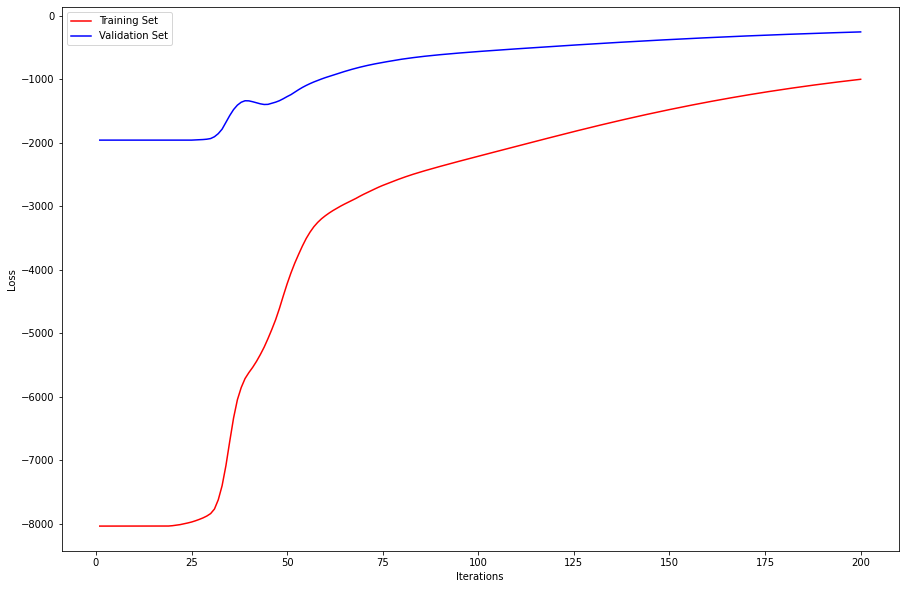

FOLD 4


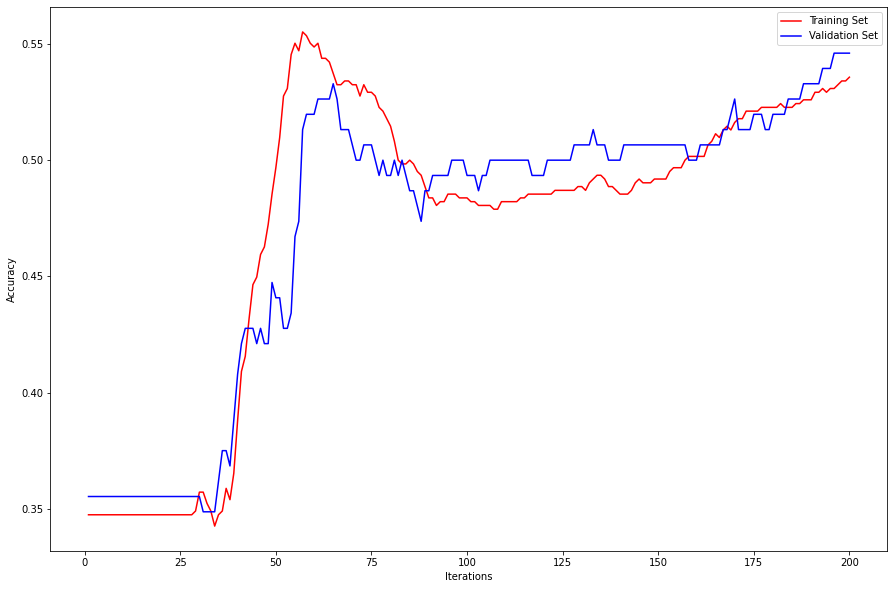

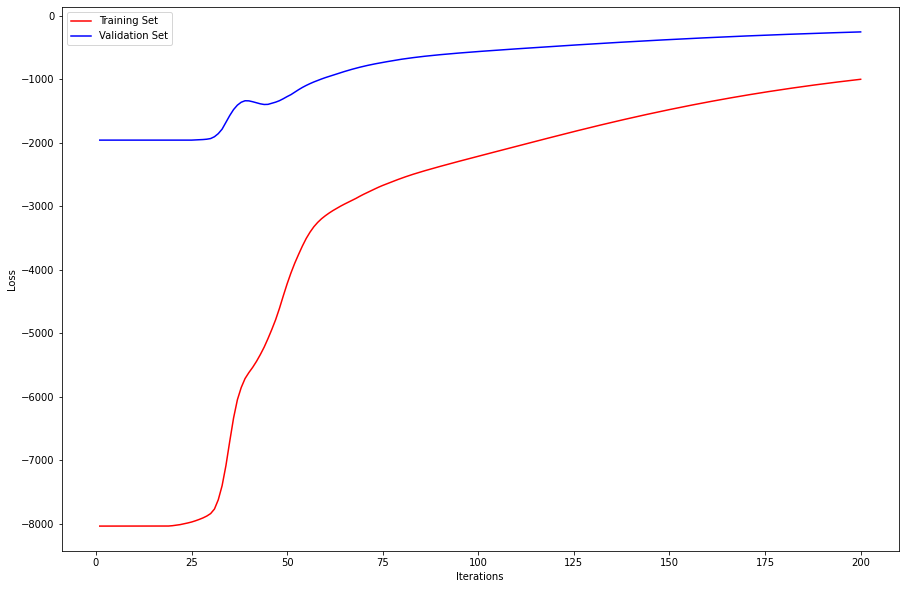

FOLD 5


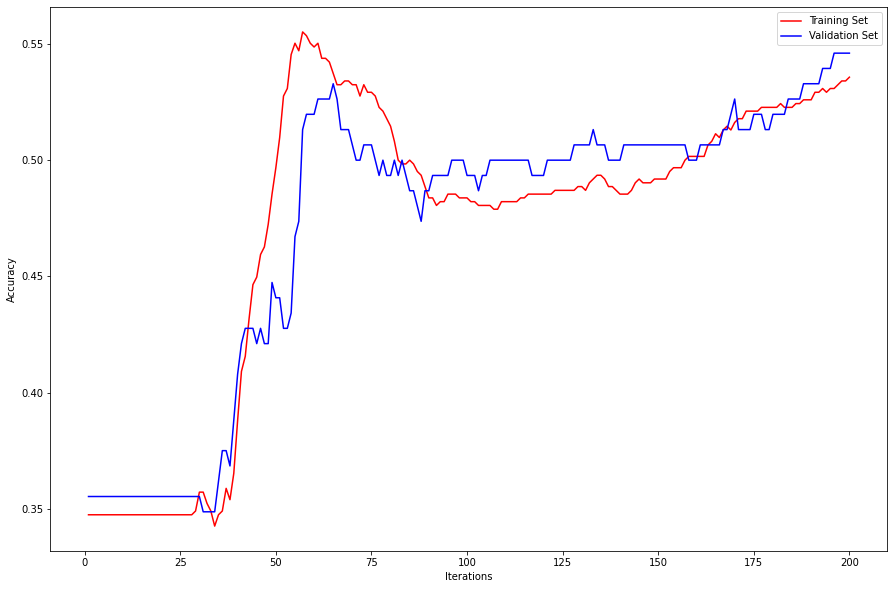

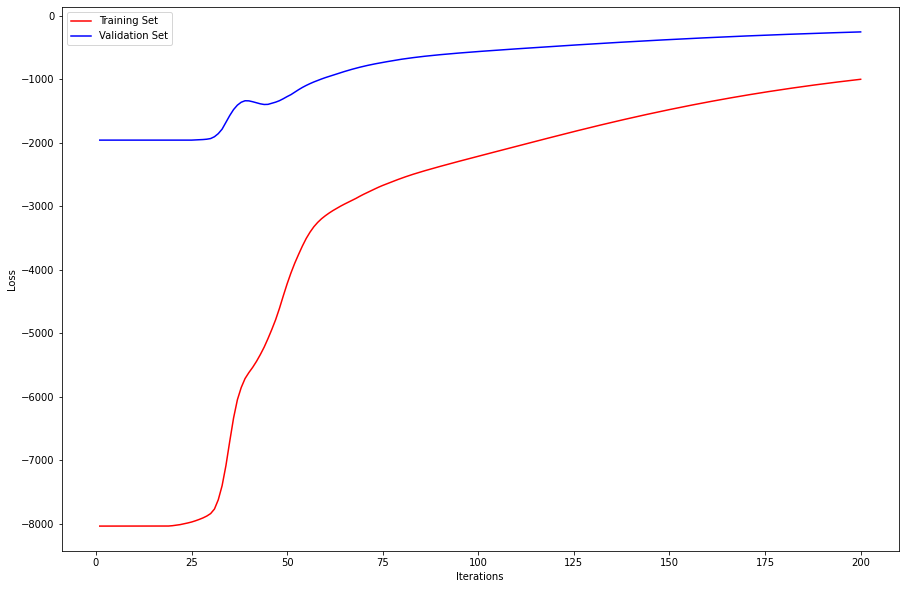

In [19]:
#For loop to get the plots on loss vs iteration and accuracy vs iteration for each fold using regularization. 
for x in range(len(data_list)):
  data = copy(data_list)
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']
  print("FOLD",x+1)
  plot_func(iterations,accuracy_training,accuracy_validation,'Accuracy','red','blue')
  plot_func(iterations,loss_training,loss_validation,'Loss','red','blue')
  
  

Sklearn model

Using sklearn logistic regression 

In [31]:
#List to store the accuracy foldwise using sklearn logistic regression class
sklearn_train_accuracy = []
sklearn_test_accuracy = []
i = 0

#For loop to use logistic regression sklearn functions of 5-folds
for x in range(len(data_list)):

  #Copying the data
  data = copy(data_list)

  #data splitted into training and validation foldwise. In every iteration folds will be different
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #Sklearn logistic regression is used to fit the model on training data
  logistic = LogisticRegression().fit(train_X,train_y)

   #Saving the model foldwise
  name = "Sklearnmodel"+str(i)+".sav"
  filename = name
  joblib.dump(logistic,filename)

  #Accuracy computed
  Train_accuracy = logistic.score(train_X,train_y)
  Test_accuracy = logistic.score(test_X,test_y)

  #Accuracy stored foldwise
  sklearn_train_accuracy.append(Train_accuracy)
  sklearn_test_accuracy.append(Test_accuracy)
  i = i+1

#Accuracy is printed foldwise
print('Train accuracy',sklearn_train_accuracy,'\n','Test accuracy',sklearn_test_accuracy,sep='\t')

Train accuracy	[0.7817589576547231, 0.7899022801302932, 0.7768729641693811, 0.760586319218241, 0.7873376623376623]	
	Test accuracy	[0.7727272727272727, 0.7207792207792207, 0.7662337662337663, 0.8311688311688312, 0.7697368421052632]


Using saved model to do the same computations as above

In [31]:
#List to store the accuracy foldwise using sklearn logistic regression class
sklearn_train_accuracy = []
sklearn_test_accuracy = []
i = 0

#For loop to use logistic regression sklearn functions of 5-folds
for x in range(len(data_list)):

  #Copying the data
  data = copy(data_list)

  #data splitted into training and validation foldwise. In every iteration folds will be different
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #Using saved the model foldwise
  name = "Sklearnmodel"+str(i)+".sav"
  filename = name
  stored_model_sklearn = joblib.load(filename)

  #Accuracy computed
  Train_accuracy = stored_model_sklearn.score(train_X,train_y)
  Test_accuracy = stored_model_sklearn.score(test_X,test_y)

  #Accuracy stored foldwise
  sklearn_train_accuracy.append(Train_accuracy)
  sklearn_test_accuracy.append(Test_accuracy)
  i = i+1

#Accuracy is printed foldwise
print('Train accuracy',sklearn_train_accuracy,'\n','Test accuracy',sklearn_test_accuracy,sep='\t')

Train accuracy	[0.7817589576547231, 0.7899022801302932, 0.7768729641693811, 0.760586319218241, 0.7873376623376623]	
	Test accuracy	[0.7727272727272727, 0.7207792207792207, 0.7662337662337663, 0.8311688311688312, 0.7697368421052632]


In [32]:
#Calculating  mean of training  accuracy values
training_mean = sum(sklearn_train_accuracy)/len(sklearn_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(sklearn_test_accuracy)/len(sklearn_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.7792916367020603 validation mean 0.7721291866028708


Sklearn regularized model results

In [35]:
#List to store the accuracy foldwise using sklearn logistic regression class
sklearn_train_accuracy = []
sklearn_test_accuracy = []
i = 0

#For loop to use logistic regression sklearn functions of 5-folds
for x in range(len(data_list)):

  #Copying the data
  data = copy(data_list)

  #data splitted into training and validation foldwise. In every iteration folds will be different
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #Sklearn logistic regression is used to fit the model on training data
  logistic = LogisticRegression(C=0.003).fit(train_X,train_y)

   #Saving the model foldwise
  name = "RegularizedSklearnmodel"+str(i)+".sav"
  filename = name
  joblib.dump(logistic,filename)

  #Accuracy computed
  Train_accuracy = logistic.score(train_X,train_y)
  Test_accuracy = logistic.score(test_X,test_y)

  #Accuracy stored foldwise
  sklearn_train_accuracy.append(Train_accuracy)
  sklearn_test_accuracy.append(Test_accuracy)
  i = i+1

#Accuracy is printed foldwise
print('Train accuracy',sklearn_train_accuracy,'\n','Test accuracy',sklearn_test_accuracy,sep='\t')

Train accuracy	[0.7736156351791531, 0.7882736156351792, 0.7703583061889251, 0.755700325732899, 0.7711038961038961]	
	Test accuracy	[0.7402597402597403, 0.7337662337662337, 0.7792207792207793, 0.8181818181818182, 0.7631578947368421]


Using saved models to do the computations of regularized models

In [33]:
#List to store the accuracy foldwise using sklearn logistic regression class
sklearn_train_accuracy = []
sklearn_test_accuracy = []
i = 0

#For loop to use logistic regression sklearn functions of 5-folds
for x in range(len(data_list)):

  #Copying the data
  data = copy(data_list)

  #data splitted into training and validation foldwise. In every iteration folds will be different
  test = data.pop(x)
  train = pd.concat(data)
  train_X=train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  train_y= train['Outcome']
  test_X=test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
  test_y= test['Outcome']

  #Using saved the model foldwise
  name = "RegularizedSklearnmodel"+str(i)+".sav"
  filename = name
  stored_model_sklearn = joblib.load(filename)

  #Accuracy computed
  Train_accuracy = stored_model_sklearn.score(train_X,train_y)
  Test_accuracy = stored_model_sklearn.score(test_X,test_y)

  #Accuracy stored foldwise
  sklearn_train_accuracy.append(Train_accuracy)
  sklearn_test_accuracy.append(Test_accuracy)
  i = i+1

#Accuracy is printed foldwise
print('Train accuracy',sklearn_train_accuracy,'\n','Test accuracy',sklearn_test_accuracy,sep='\t')

Train accuracy	[0.7736156351791531, 0.7882736156351792, 0.7703583061889251, 0.755700325732899, 0.7711038961038961]	
	Test accuracy	[0.7402597402597403, 0.7337662337662337, 0.7792207792207793, 0.8181818181818182, 0.7631578947368421]


In [34]:
#Calculating  mean of training  accuracy values
training_mean = sum(sklearn_train_accuracy)/len(sklearn_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(sklearn_test_accuracy)/len(sklearn_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.7718103557680105 validation mean 0.7669172932330828
